# Creating Virtual Environment

In [ ]:
#!pip install virtualenv
# !virtualenv my-venv

# Activating the virtual environment

In [ ]:
!source my-venv/bin/activate

# Importing Relevant libraries

In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [13]:
df = pd.read_csv('/content/drive/MyDrive/elevvo/Task 1/StudentPerformanceFactors.csv')

In [ ]:
df.head(20)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,2,No,High School,Far,Male,66
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,High,High,Public,Positive,5,No,High School,Moderate,Male,72


In [ ]:
# Checking basic information

print("Data Type of the features present in the dataset")
print("\n")
print(df.dtypes) # checking the datatype of features
print("\n")
print("Dataframe Shape: ",format(df.shape)) # checking the dataframe
print("\n")
print("Missing Values are:")
print("\n")
print(df.isnull().sum()) # checking the missing values

Data Type of the features present in the dataset


Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object


Dataframe Shape:  (6607, 20)


Missing Values are:


Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracur

In [ ]:
print(df['Teacher_Quality'].unique())
print(df['Parental_Education_Level'].unique())
print(df['Distance_from_Home'].unique())

['Medium' 'High' 'Low' nan]
['High School' 'College' 'Postgraduate' nan]
['Near' 'Moderate' 'Far' nan]


In [ ]:
for col in ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']:
    print(f"\n{col} distribution:")
    print(df[col].value_counts(normalize=True))


Teacher_Quality distribution:
Teacher_Quality
Medium    0.601164
High      0.298208
Low       0.100628
Name: proportion, dtype: float64

Parental_Education_Level distribution:
Parental_Education_Level
High School     0.494553
College         0.305202
Postgraduate    0.200246
Name: proportion, dtype: float64

Distance_from_Home distribution:
Distance_from_Home
Near        0.593884
Moderate    0.305505
Far         0.100612
Name: proportion, dtype: float64


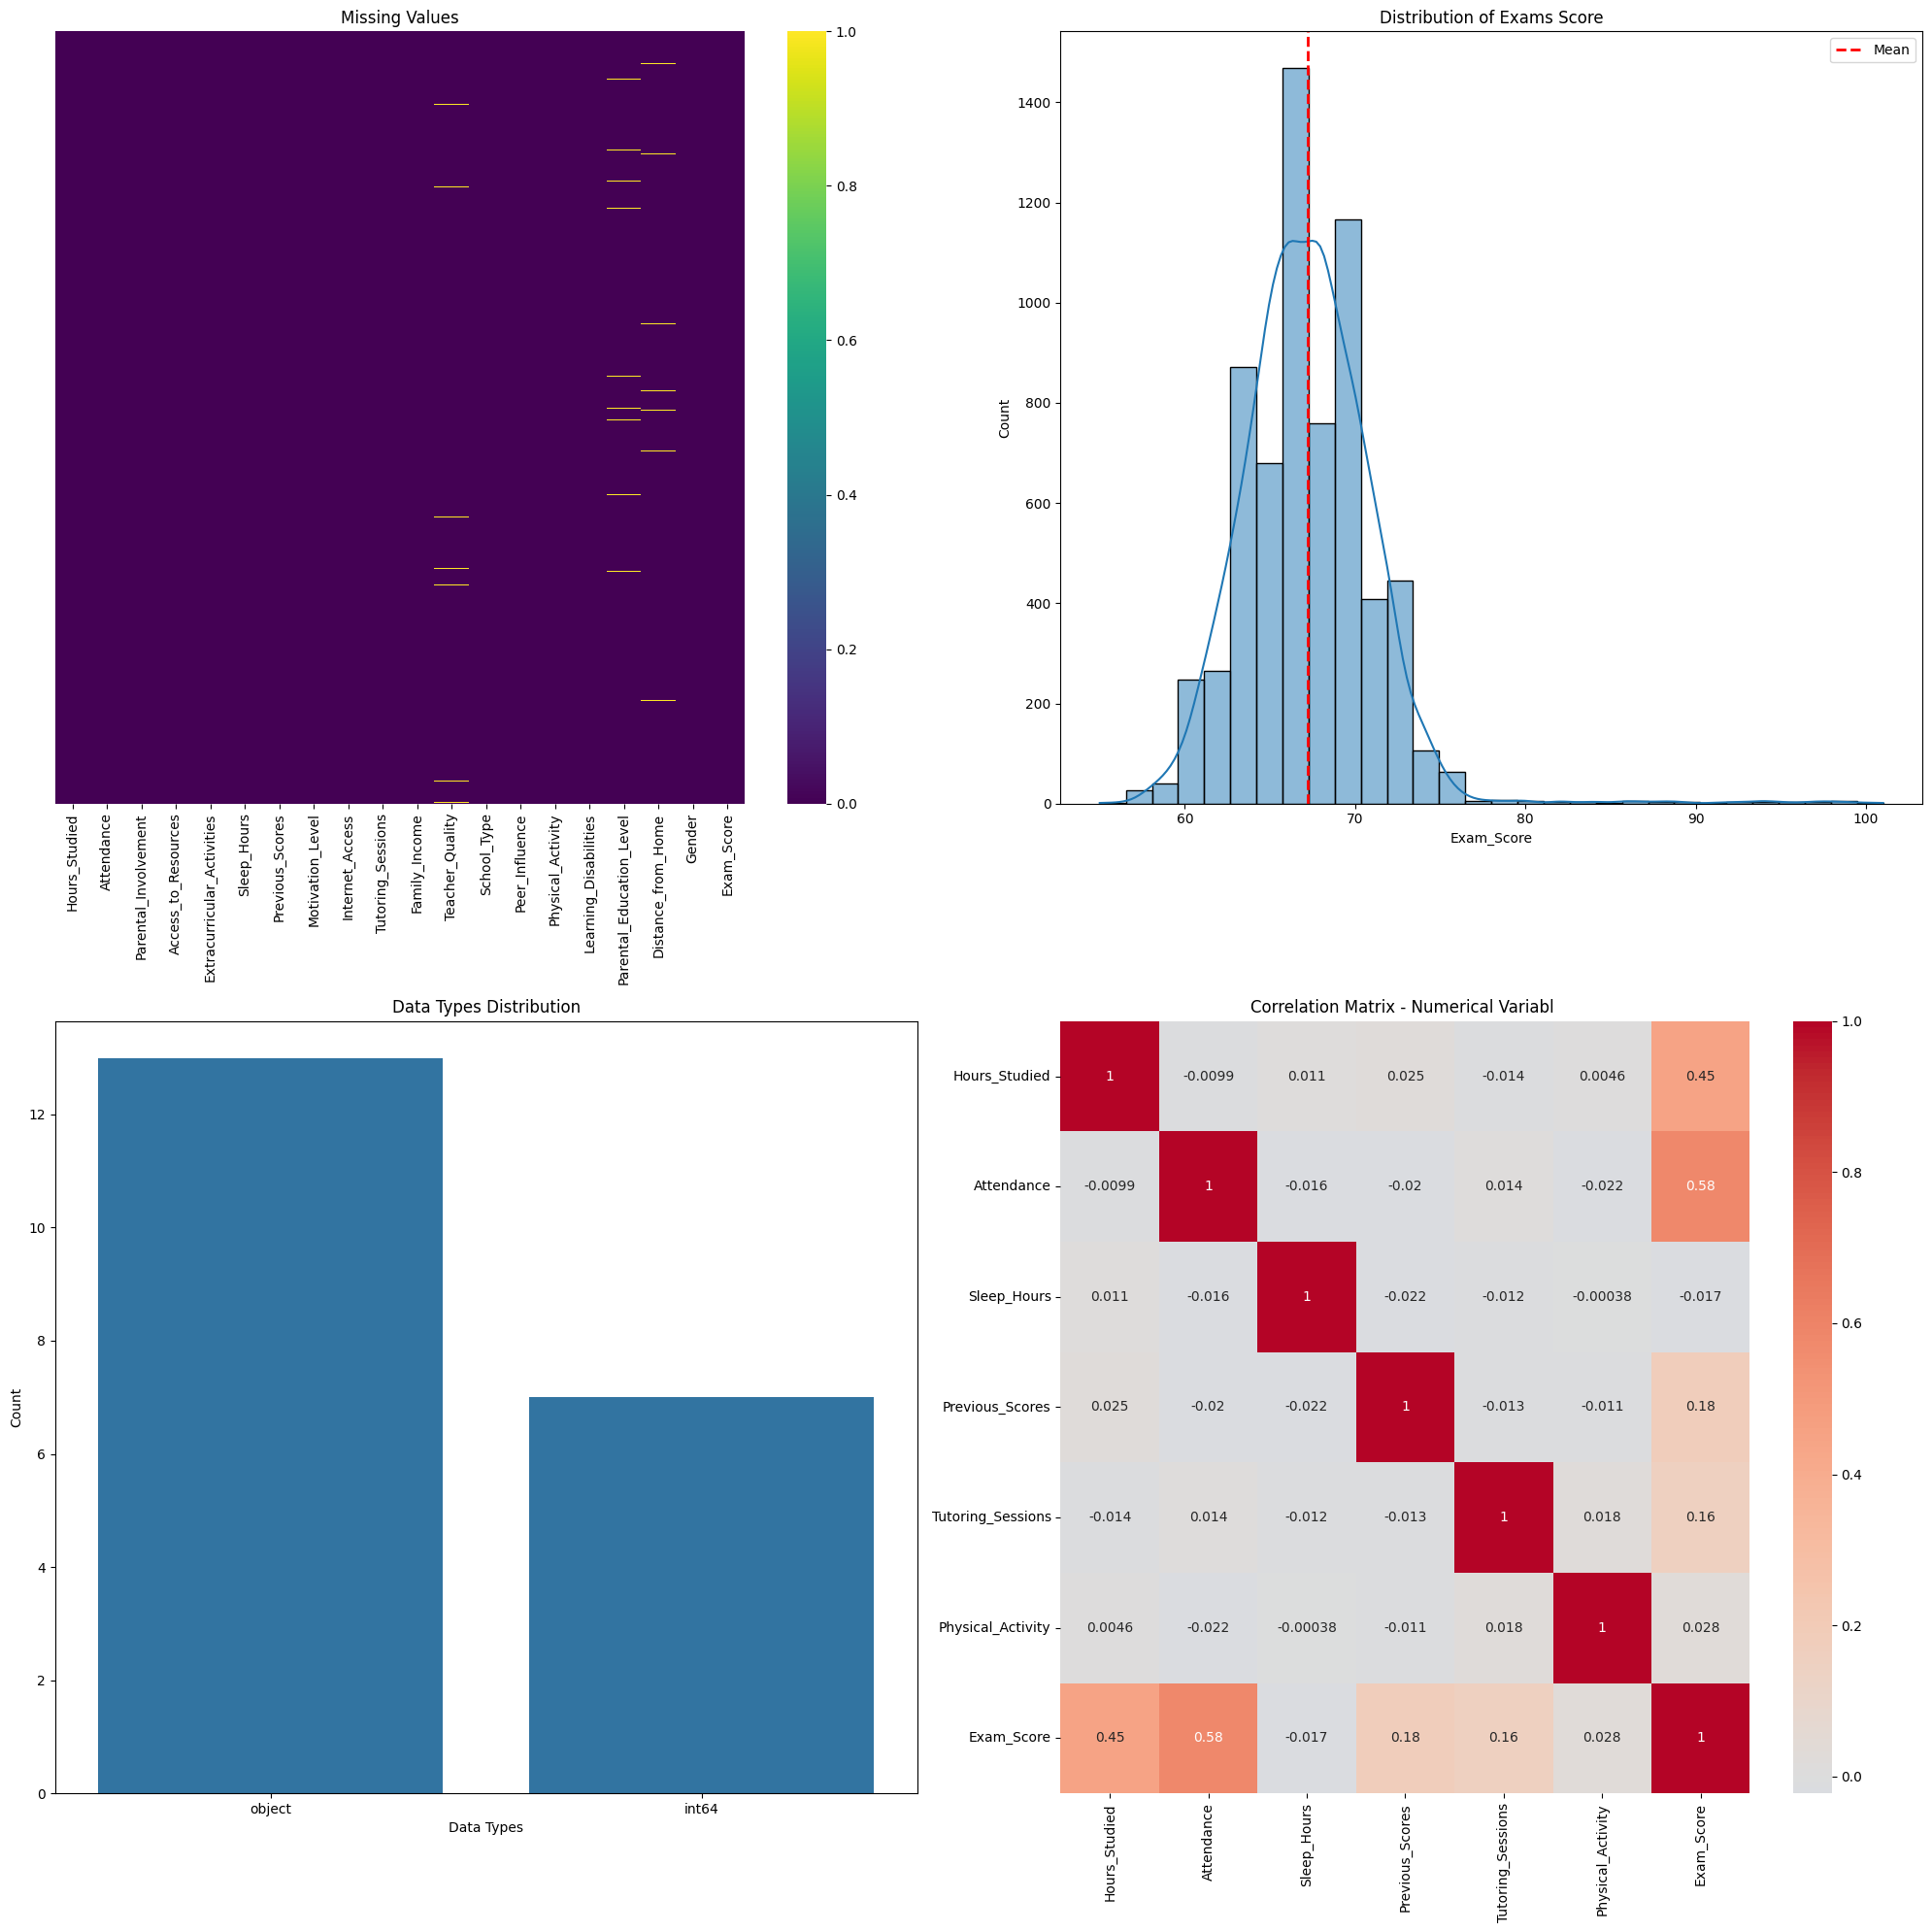

In [18]:
# Visualizing the missing values in the dataset
fig , axes = plt.subplots(2,2,figsize = (20,20))
sns.heatmap(df.isnull(), yticklabels=False , cbar=True, cmap='viridis', ax=axes[0,0])
axes[0,0].set_title('Missing Values')



# Distribution of Target variable
sns.histplot(data=df, x='Exam_Score', bins=30, kde=True, ax=axes[0,1])
axes[0,1].set_title('Distribution of Exams Score')
axes[0,1].axvline(df['Exam_Score'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
axes[0,1].legend()


# Data Type Visualization

data_types = df.dtypes.value_counts()
sns.barplot(x=data_types.index, y=data_types.values, ax=axes[1,0])
axes[1,0].set_title('Data Types Distribution')
axes[1,0].set_xlabel('Data Types')
axes[1,0].set_ylabel('Count')

# Visualizing the Correlation Matrics for numerical values

numerical_cols = df.select_dtypes(include = [np.number]).columns
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot = True, cmap= 'coolwarm',center = 0, ax =axes[1,1])
axes[1,1].set_title('Correlation Matrix - Numerical Variabl ')

plt.tight_layout()
plt.show()

Doing Exploratory Data Analysis - key Performance Drivers

In [ ]:
# Understanding Study Habits and Academic Performance and creating a comprehensive study habits analysis